In [1]:
import pandas
from sklearn.feature_extraction.text import CountVectorizer
import re
from tokenizer import tokenize
from nltk.corpus import stopwords
from nltk import corpus
import seaborn as sns
from tqdm import tqdm

In [2]:
stop_words = list(set(stopwords.words("german")))
x = ["a","ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","ander","andere","anderem","anderen","anderer","anderes","anderm","andern","anderr","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deinen","deiner","deines","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derer","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einig","einige","einigem","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","eurem","euren","eurer","eures","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","hab","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","keines","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","uns","unse","unsem","unsen","unser","unsere","unserer","unses","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr","wann","war","waren","warst","wart","warum","was","weg","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","woher","wohin","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens","cm","tr","gt","gro","nge","xl","gr","gek","mmte","unser","die","das","der","material","sch","hergestellt","schnitt","tragen","angenehm","rmel","farben","verschluss","shirt"]
for y in x:
    stop_words.append(y)
stop_words = [sw.lower() for sw in stop_words]

In [3]:
dataset = pandas.read_csv('/home/graphn/repositories/you_conscious/dl_xp/data/keywords/keywords_training.csv', delimiter = ';')

/home/graphn/repositories/you_conscious/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2,6,7,8,9,10,23,24,25,26,27,28,30,32,33,35,36,38,39,41,42,43,46,47,50,51,53,55,57,58,59,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,104,105,115,118,120,121,124,125,130,133,134,135,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
def get_tokens(text: str) -> list:
    list_tokens = []

    text = str(text)
    text = re.sub('[^a-zA-Z]', ' ',text)
    for token in tokenize(text):
        _, tkn, _ = token
        if tkn is not None:
            tkn_lower = tkn.lower()

            if tkn_lower not in stop_words:
                list_tokens.append(tkn)
    return list_tokens

In [7]:
description = dataset["description"].tolist()
descriptions = [get_tokens(desc) for desc in tqdm(description,total = len(description))]

100%|██████████| 77396/77396 [00:56<00:00, 1368.95it/s]


In [8]:
descriptions[10]

['Reebok',
 'nachhaltigen',
 'Mode',
 'Rundhalsausschnitt',
 'Kurze',
 'Grafikdruck',
 'Brust',
 'Reebok',
 'Logoaufdruck',
 'ndchen',
 'Normale',
 'Passform',
 'llt',
 'normal']

In [9]:
for desc in descriptions:
    for token in desc:
        if token in stop_words:
            desc.remove(stopwo)

In [10]:
corpus = []
for d in descriptions:
    d_tmp = []
    for token in d:
        
        if token not in stop_words:
            d_tmp.append(token)
    d = " ".join(d_tmp)
    corpus.append(d)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [12]:
list(cv.vocabulary_.keys())[:12]

['hemd',
 'star',
 'perfekt',
 'alltag',
 'knopfleiste',
 'brusttaschen',
 'kurze',
 'normale',
 'passform',
 'bestelle',
 'einfach',
 'bliche']

[Text(0, 0, 'baumwolle'),
 Text(0, 0, 'bio'),
 Text(0, 0, 'passform'),
 Text(0, 0, 'gots'),
 Text(0, 0, 'zertifiziert'),
 Text(0, 0, 'vegan'),
 Text(0, 0, 'biobaumwolle'),
 Text(0, 0, 'fair'),
 Text(0, 0, 'fit'),
 Text(0, 0, 'brustumfang'),
 Text(0, 0, 'design'),
 Text(0, 0, 'jersey'),
 Text(0, 0, 'ausschnitt'),
 Text(0, 0, 'qualit'),
 Text(0, 0, 'ber'),
 Text(0, 0, 'farbe'),
 Text(0, 0, 'details'),
 Text(0, 0, 'ma'),
 Text(0, 0, 'polyester'),
 Text(0, 0, 'damen'),
 Text(0, 0, 'besteht'),
 Text(0, 0, 'obermaterial'),
 Text(0, 0, 'saum'),
 Text(0, 0, 'rei'),
 Text(0, 0, 'stoff'),
 Text(0, 0, 'look'),
 Text(0, 0, 'model'),
 Text(0, 0, 'weich'),
 Text(0, 0, 'kleid'),
 Text(0, 0, 'organic'),
 Text(0, 0, 'einfach'),
 Text(0, 0, 'print'),
 Text(0, 0, 'rundhalsausschnitt'),
 Text(0, 0, 'geschnitten'),
 Text(0, 0, 'sche'),
 Text(0, 0, 'produkt'),
 Text(0, 0, 'fairtrade'),
 Text(0, 0, 'ragwear'),
 Text(0, 0, 'elasthan'),
 Text(0, 0, 'logo'),
 Text(0, 0, 'produziert'),
 Text(0, 0, 'rundhals'),
 

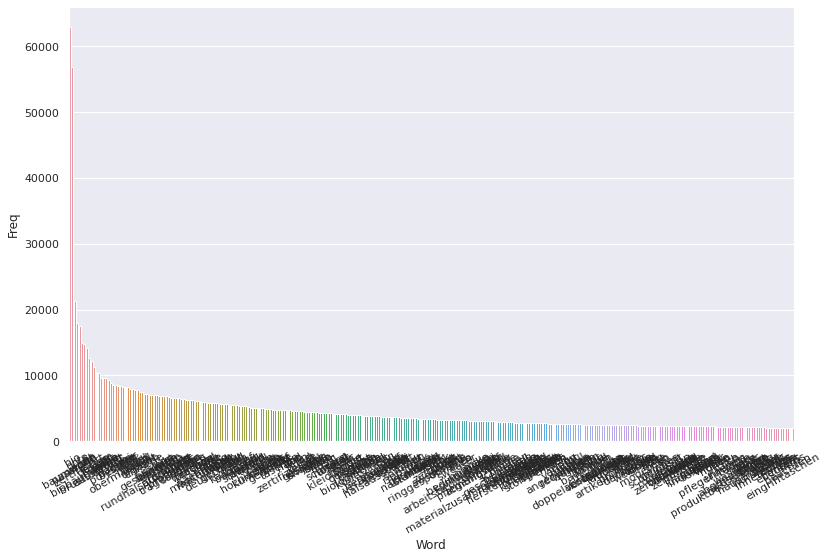

In [13]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=300)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                      Bi-gram   Freq
0               bio baumwolle  40166
1           gots zertifiziert   6697
2             maschinenw sche   6091
3                 regular fit   4742
4               baumwolle bio   4485
5          biologischem anbau   4056
6               single jersey   4047
7                 tragegef hl   3695
8                   fair wear   3530
9          ringgesponnene bio   3328
10  kontrolliert biologischem   3309
11           passform regular   2906
12                besteht bio   2896
13            wear foundation   2750
14           normale passform   2733
15         fairen bedingungen   2715
16                  nat rlich   2699
17        brustumfang gesamtl   2688
18    brustumfang brustumfang   2663
19             kleidungsst ck   2569
20                   ma flach   2501
21              modelgr model   2471
22  fairen arbeitsbedingungen   2383
23                   oeko tex   2364
24             global organic   2282
25            organic textile   2282
2

[Text(0, 0, 'bio baumwolle'),
 Text(0, 0, 'gots zertifiziert'),
 Text(0, 0, 'maschinenw sche'),
 Text(0, 0, 'regular fit'),
 Text(0, 0, 'baumwolle bio'),
 Text(0, 0, 'biologischem anbau'),
 Text(0, 0, 'single jersey'),
 Text(0, 0, 'tragegef hl'),
 Text(0, 0, 'fair wear'),
 Text(0, 0, 'ringgesponnene bio'),
 Text(0, 0, 'kontrolliert biologischem'),
 Text(0, 0, 'passform regular'),
 Text(0, 0, 'besteht bio'),
 Text(0, 0, 'wear foundation'),
 Text(0, 0, 'normale passform'),
 Text(0, 0, 'fairen bedingungen'),
 Text(0, 0, 'nat rlich'),
 Text(0, 0, 'brustumfang gesamtl'),
 Text(0, 0, 'brustumfang brustumfang'),
 Text(0, 0, 'kleidungsst ck'),
 Text(0, 0, 'ma flach'),
 Text(0, 0, 'modelgr model'),
 Text(0, 0, 'fairen arbeitsbedingungen'),
 Text(0, 0, 'oeko tex'),
 Text(0, 0, 'global organic'),
 Text(0, 0, 'organic textile'),
 Text(0, 0, 'medium fit'),
 Text(0, 0, 'textile standard'),
 Text(0, 0, 'karlskopf einfach'),
 Text(0, 0, 'einfach geile')]

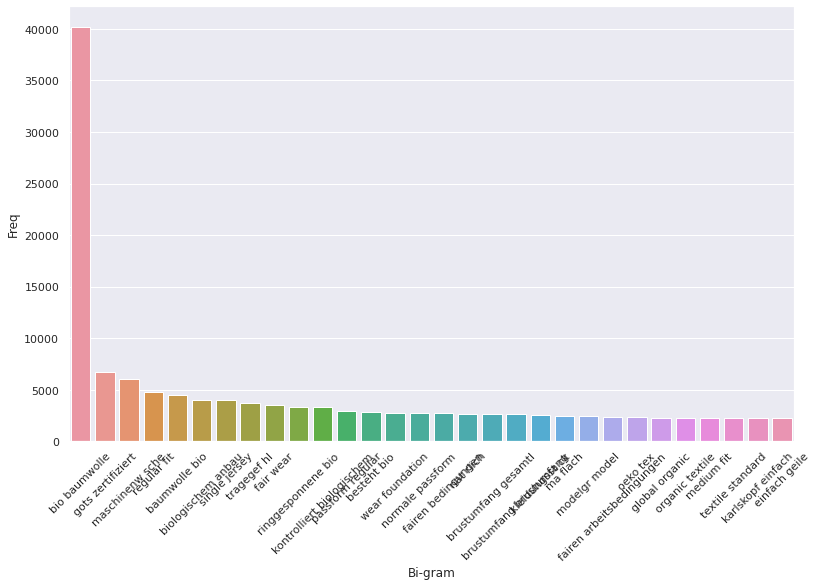

In [14]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=30)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                                Tri-gram  Freq
0           ringgesponnene bio baumwolle  3328
1        kontrolliert biologischem anbau  3307
2                  besteht bio baumwolle  2733
3                   fair wear foundation  2689
4                   passform regular fit  2674
5                 global organic textile  2282
6               organic textile standard  2252
7                karlskopf einfach geile  2234
8                einfach geile klamotten  2234
9    brustumfang brustumfang brustumfang  2147
10   baumwolle kontrolliert biologischem  2082
11            maschinenw sche schleudern  2043
12                 https sorbasshoes com  2002
13                    sorbasshoes com wp  2002
14                        com wp content  2002
15                    wp content uploads  2002
16                  zertifikat fair wear  1978
17                    gots organic ceres  1940
18      klassisch geschnittenes rundhals  1876
19  fairen arbeitsbedingungen zertifikat  1875
20    arbeits

[Text(0, 0, 'ringgesponnene bio baumwolle'),
 Text(0, 0, 'kontrolliert biologischem anbau'),
 Text(0, 0, 'besteht bio baumwolle'),
 Text(0, 0, 'fair wear foundation'),
 Text(0, 0, 'passform regular fit'),
 Text(0, 0, 'global organic textile'),
 Text(0, 0, 'organic textile standard'),
 Text(0, 0, 'karlskopf einfach geile'),
 Text(0, 0, 'einfach geile klamotten'),
 Text(0, 0, 'brustumfang brustumfang brustumfang'),
 Text(0, 0, 'baumwolle kontrolliert biologischem'),
 Text(0, 0, 'maschinenw sche schleudern'),
 Text(0, 0, 'https sorbasshoes com'),
 Text(0, 0, 'sorbasshoes com wp'),
 Text(0, 0, 'com wp content'),
 Text(0, 0, 'wp content uploads'),
 Text(0, 0, 'zertifikat fair wear'),
 Text(0, 0, 'gots organic ceres'),
 Text(0, 0, 'klassisch geschnittenes rundhals'),
 Text(0, 0, 'fairen arbeitsbedingungen zertifikat'),
 Text(0, 0, 'arbeitsbedingungen zertifikat fair'),
 Text(0, 0, 'achselbreite ftbreite te'),
 Text(0, 0, 'bio baumwolle elasthan'),
 Text(0, 0, 'verwendete bio baumwolle'),
 Te

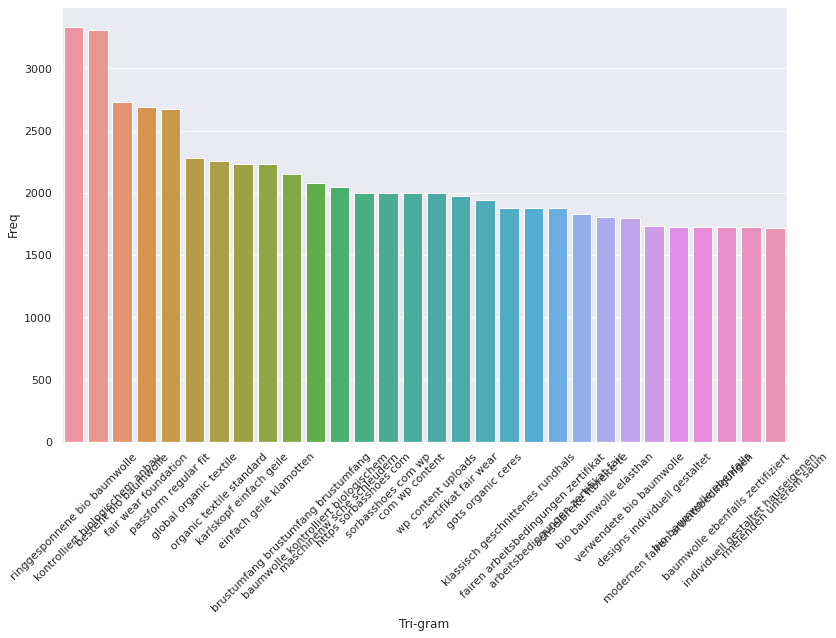

In [15]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=30)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[50]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [17]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
Sneaker Nike Artikel Angebot ausgeschlossen Schn rung Fersenlasche Nike Swoosh Logo leichte Vista Grind Zwischensohle recyceltem Schaum Nike Zoom Sneakern dicke Sohle geformtes Profil

Keywords:
geformtes 0.367
profil 0.34
ausgeschlossen 0.307
dicke 0.304
sneakern 0.286


In [18]:
doc=corpus[53]
sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,50)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
Jacke Polo Ralph Lauren nachhaltigen Mode breiter Kragen Druckknopfleiste Brusttaschen Seitentaschen Manschetten Druckkn pfen Normale Passform llt normal

Keywords:
geformtes 0.367
profil 0.34
ausgeschlossen 0.307
dicke 0.304
sneakern 0.286
schn rung 0.258
rung 0.255
leichte 0.249
recyceltem 0.235
sneaker 0.227
sohle 0.221
schn 0.221
artikel 0.22
logo 0.186


In [19]:
topwords = []
for t in top_words:
    if t[0] not in stop_words:
        
        topwords.append(t[0])

topwords.append("Kunstleder")

In [20]:
topwords = []
import csv
with open("/home/graphn/repositories/you_conscious/data_processing/utils/data_dependencies/features.csv","r",encoding="utf-8") as f:
    csv_reader = csv.reader(f,delimiter=";")
    for string2Find_feature2Write_columnFeature in csv_reader:
        string2_find = string2Find_feature2Write_columnFeature[0]
        feature2_write = string2Find_feature2Write_columnFeature[1]
        column_feature = string2Find_feature2Write_columnFeature[2]
        topwords.append(feature2_write)

In [21]:
from collections import defaultdict
training_data = defaultdict(list)
for text in corpus:
    training_data[text] = []
    list_keywords = []
    for k in topwords:
        if k in text:
        #print(k,keywords[k])
            list_keywords.append(k)
    training_data[text] = list_keywords


In [22]:
topwords

['feature',
 'MADE IN GREEN by OEKO-TEX',
 'Aus nachhaltiger Produktion',
 'Aus fairer Produktion',
 'Fair-Trade',
 'Pflanzenfärbung',
 'Aus nachhaltiger Produktion',
 'Aus nachhaltiger Produktion',
 'Bio-Baumwolle',
 'Bio-Denim',
 'Recycled',
 'Bio-Baumwolle',
 'Bio-Baumwolle',
 'Zero Waste',
 'Bio-Baumwolle',
 'Bio-Baumwolle',
 'Eukalyptus',
 'Recycled',
 'Recycled',
 'Recycled',
 'Recycelbar',
 'Recycled',
 'Recycled',
 'Recycled',
 'Recycled Texile',
 'Zero Waste',
 'Bio-Baumwolle',
 'Bio-Baumwolle',
 'Bio-Baumwolle',
 'GOTS (Global Organic Textile Standard)',
 'GOTS (Global Organic Textile Standard)',
 'GOTS (Global Organic Textile Standard)',
 'GOTS (Global Organic Textile Standard)',
 'Bio-Baumwolle',
 'GOTS (Global Organic Textile Standard)',
 'Recycled',
 'Recycled',
 'Recycled',
 'Recycled',
 'PVC',
 'Nylon',
 'Synthetik',
 'Textil',
 'Leinen',
 'Polyester',
 'Leinen',
 'Baumwolle',
 'Papierstroh',
 'Polyurethan',
 'Kunstleder',
 'Papier',
 'Stroh',
 'Nylon',
 'Leinen',
 'Tex

In [23]:
training_data_path = "/home/graphn/repositories/you_conscious/dl_xp/data/keywords/training_data.csv"
import csv
with open(training_data_path,"w",encoding="utf-8") as o:
    csv_writer = csv.writer(o,delimiter="\t")
    csv_writer.writerow(["text","keywords"])
    for text,keywords in training_data.items():
        keywords = list(set(keywords))
        csv_writer.writerow([text,",".join(keywords)])
        